# Mathematical Underpinnings - Lab 10

In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [302]:
from sklearn.preprocessing import scale

In [303]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import Lasso

## Task 1

In [304]:
df = pd.read_csv('prostate.data', sep="\t", index_col=0)

In [305]:
X = np.array(df.iloc[:, 0:8])
Y = np.array(df.iloc[:, 8])

In [306]:
X = scale(X)
Y = scale(Y)

### a)

In [307]:
mod_lars = Lars(fit_intercept=False)
# fit
mod_lars.fit(X, Y)

Lars(fit_intercept=False)

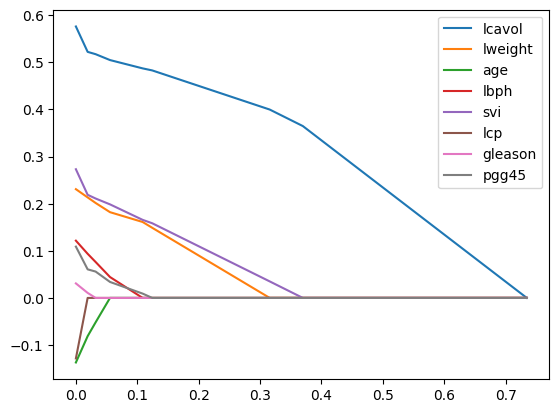

In [308]:
# plot
plt.figure()

plt.plot(mod_lars.alphas_, mod_lars.coef_path_.T)

plt.legend(df.columns[0:8], loc = 'upper right')

plt.show()

Order in which the variables are included in the model:

lcavol, svi, lweight, pgg45, lbph, age, gleason, lcp

### b)

In [309]:
mod_lars.alphas_[0]

0.7344603262136732

In [310]:
mod_lars.alphas_

array([0.73446033, 0.36963266, 0.3157    , 0.12438766, 0.10869606,
       0.05558212, 0.03210302, 0.01913394, 0.        ])

### b1)

In [311]:
selected_variables = []

In [312]:
s1 = np.abs(X.T @ Y.reshape(-1, 1)).argmax()
selected_variables.append(s1)
selected_variables

[0]

### b2)

In [313]:
mod1 = LinearRegression(fit_intercept=False)
mod1.fit(X[:, selected_variables].reshape(-1, 1), Y)
mod1.coef_

array([0.73446033])

### b3)

In [314]:
# code 
alphas = np.linspace(0, 1, 100)
y_hat = mod1.predict(X[:, selected_variables].reshape(-1, 1))

res = np.zeros((len(Y), len(alphas)))

for i, alpha in enumerate(alphas):
    res[:, i] = Y - alpha * y_hat

res_corrs = np.zeros((X.shape[1], len(alphas)))

for i, alpha in enumerate(alphas):
    for j in range(X.shape[1]):
        res_corrs[j, i] = np.corrcoef(X[:, j], res[:, i])[0, 1]


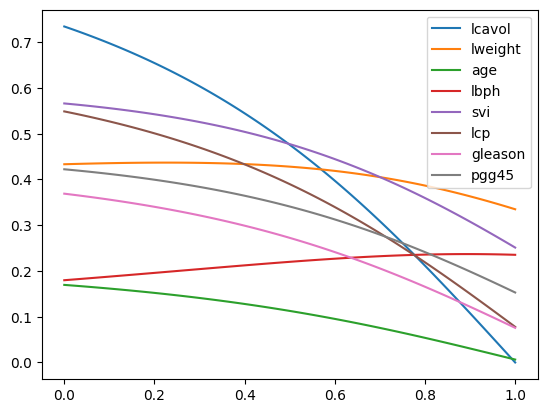

In [315]:
# plot
plt.plot(alphas, res_corrs.T)
plt.legend(df.columns[0:8], loc = 'upper right')
plt.show()

Blue line which correponds to the first chosen variable

### b4)

The 'svi' variable bill be chosen next. That is because it is the first variable to 'match' the correlation of $S_1$ when $\alpha$ increases. The value of alpha when this happens is approximately equal to 0.5.

### b5)

$$ \textrm{Cor}(Y - \tilde\alpha\hat Y, X_i) = ... \cdot\textrm{Cor}(Y, X_i) - ... \cdot \tilde\alpha \cdot \textrm{Cor}(\tilde\alpha\hat Y, X_i) $$

In our case, $i=0$, $j=4$:
$$ |\textrm{Cor}(Y - \tilde\alpha\hat Y, X_i)| = |\textrm{Cor}(Y - \tilde\alpha\hat Y, X_j)|$$

In [316]:
# code
def get_number(alpha, X_i, y_hat):
    return np.std(Y) * np.corrcoef(X_i, Y)[0, 1] - \
        np.std(y_hat) * alpha * np.corrcoef(X_i, y_hat)[0, 1]

results = np.zeros((len(alphas), X.shape[1]))

for i, a in enumerate(alphas):
    for j, X_j in enumerate(X.T):
        results[i, j] = get_number(a, X_j, y_hat)

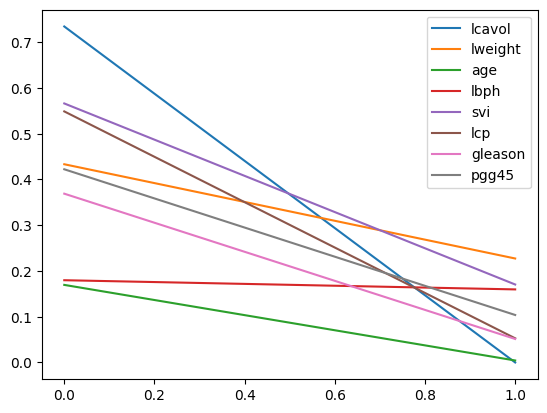

In [317]:
# plot
plt.plot(alphas, results)
plt.legend(df.columns[:8])
plt.show()

In [318]:
last_var = selected_variables[-1]
new_var = np.argmin(
    (
        np.nan_to_num(
            (np.std(Y)* np.corrcoef(X.T, Y)[selected_variables[-1], -1] - np.std(Y)* np.corrcoef(X.T, Y)[:-1, -1]) / (np.std(y_hat)* np.corrcoef(X.T, y_hat)[selected_variables[-1], -1] - np.std(y_hat)* np.corrcoef(X.T, y_hat)[:-1, -1]), nan = 1)))


a = np.std(Y) * np.corrcoef(X.T, Y)[last_var, -1] - np.std(Y)* np.corrcoef(X.T, Y)[:-1,-1]
b = np.std(y_hat) * np.corrcoef(X.T, y_hat)[last_var, -1] - np.std(y_hat)* np.corrcoef(X.T, y_hat)[:-1,-1]

gamma_2 = np.min(np.nan_to_num(a/b, nan = 1))

gamma_2, new_var

/var/folders/n6/5gy347nj2xvdd_c2m46c4x880000gn/T/ipykernel_31523/4164065493.py:5: RuntimeWarning: invalid value encountered in divide
  (np.std(Y)* np.corrcoef(X.T, Y)[selected_variables[-1], -1] - np.std(Y)* np.corrcoef(X.T, Y)[:-1, -1]) / (np.std(y_hat)* np.corrcoef(X.T, y_hat)[selected_variables[-1], -1] - np.std(y_hat)* np.corrcoef(X.T, y_hat)[:-1, -1]), nan = 1)))
/var/folders/n6/5gy347nj2xvdd_c2m46c4x880000gn/T/ipykernel_31523/4164065493.py:11: RuntimeWarning: invalid value encountered in divide
  gamma_2 = np.min(np.nan_to_num(a/b, nan = 1))


(0.4967289013871957, 4)

In [319]:
r_1_alpha2 = Y - gamma_2 * y_hat

### b6)

In [320]:
alpha2 = np.std(Y)* np.corrcoef(X[:, new_var], Y)[0, 1] - np.std(y_hat)*gamma_2*np.corrcoef(X[:, new_var], y_hat)[0, 1]
alpha2

0.3696326552610745

In [321]:
Y = Y - y_hat * gamma_2

In [322]:
selected_variables.append(new_var)
selected_variables

[0, 4]

### b7)

In [323]:
mod2 = LinearRegression(fit_intercept=False)
mod2.fit(X[:, selected_variables], Y)
mod2.coef_

array([0.24020136, 0.24020136])

### b8)

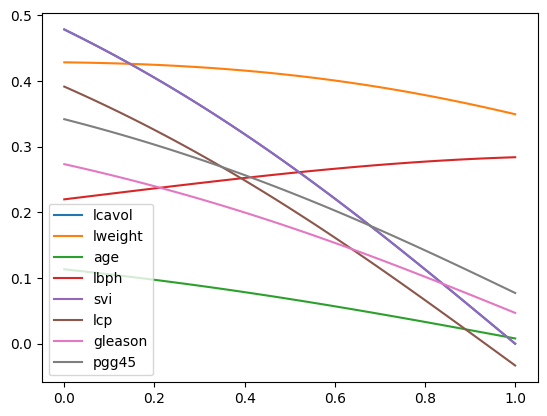

In [324]:
# code 
alphas = np.linspace(0, 1, 100)
y_hat = mod2.predict(X[:, selected_variables])

res = np.zeros((len(Y), len(alphas)))

for i, alpha in enumerate(alphas):
    res[:, i] = Y - alpha * y_hat

res_corrs = np.zeros((X.shape[1], len(alphas)))

for i, alpha in enumerate(alphas):
    for j in range(X.shape[1]):
        res_corrs[j, i] = np.corrcoef(X[:, j], res[:, i])[0, 1]

plt.plot(alphas, res_corrs.T)
plt.legend(df.columns[:8])
plt.show()

lcavol and svi are overlapping which corresponds to the mentioned behaviour.

### b9)

It will be 'lweight', alpha approximately equal to 0.19.

### b10)

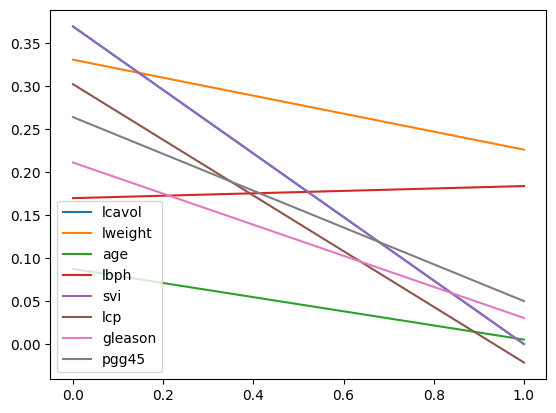

In [325]:
values = np.zeros((X.shape[1], len(alphas)))

for i in range(X.shape[1]):  
    for j, alpha in enumerate(alphas):
        values[i, j] = np.std(Y)* np.corrcoef(X[:, i], Y)[0, 1] - np.std(y_hat)*alpha*np.corrcoef(X[:, i], y_hat)[0, 1]

plt.plot(alphas, values.T)
plt.legend(df.columns[0:8])
plt.show()

### b11)

In [331]:
last_var = selected_variables[-1]
new_var = np.argmin((np.nan_to_num((np.std(Y)* np.corrcoef(X.T, Y)[selected_variables[-1], -1] - np.std(r_1_alpha2)* np.corrcoef(X.T, r_1_alpha2)[:-1, -1]) / (np.std(y_hat)* np.corrcoef(X.T, y_hat)[selected_variables[-1], -1] - np.std(y_hat)* np.corrcoef(X.T, y_hat)[:-1, -1]), nan = 1)))

/var/folders/n6/5gy347nj2xvdd_c2m46c4x880000gn/T/ipykernel_31523/693692013.py:2: RuntimeWarning: invalid value encountered in divide
  new_var = np.argmin((np.nan_to_num((np.std(Y)* np.corrcoef(X.T, Y)[selected_variables[-1], -1] - np.std(r_1_alpha2)* np.corrcoef(X.T, r_1_alpha2)[:-1, -1]) / (np.std(y_hat)* np.corrcoef(X.T, y_hat)[selected_variables[-1], -1] - np.std(y_hat)* np.corrcoef(X.T, y_hat)[:-1, -1]), nan = 1)))


In [336]:
df.columns[new_var]

'svi'

In [338]:
a = np.std(Y) * np.corrcoef(X.T, Y)[last_var, -1] - np.std(Y)* np.corrcoef(X.T, Y)[:-1,-1]
b = np.std(y_hat) * np.corrcoef(X.T, y_hat)[last_var, -1] - np.std(y_hat)* np.corrcoef(X.T, y_hat)[:-1,-1]

gamma_3 = np.min(np.nan_to_num(a/b, nan = 1))
gamma_3

/var/folders/n6/5gy347nj2xvdd_c2m46c4x880000gn/T/ipykernel_31523/194383473.py:4: RuntimeWarning: invalid value encountered in divide
  gamma_3 = np.min(np.nan_to_num(a/b, nan = 1))


0.14590879649354718

In [341]:
alpha3 = np.std(Y)* np.corrcoef(X[:, new_var], Y)[0, 1] - np.std(y_hat)*gamma_3*np.corrcoef(X[:, new_var], y_hat)[0, 1]
alpha3

0.3156999993872168

### c)

[Link to my own implementation of LARS](https://github.com/sobieskibj/lars)

## Task 2

In [330]:
X = pd.read_table("data/SRBCT_X.txt", sep=" ")
Y = pd.read_table("data/SRBCT_Y.txt", sep=" ")

X = np.array(X)
Y = np.array(Y)[:,0]

FileNotFoundError: [Errno 2] No such file or directory: 'data/SRBCT_X.txt'

In [ ]:
X = scale(X)
Y = Y - np.mean(Y)

### a)

In [ ]:
mod_lars = Lars(n_nonzero_coefs=80)
# fit

In [ ]:
# plot

In [ ]:
# the order

### b)

In [ ]:
mod_lassolars = LassoLars(alpha=0.15)
# fit

In [ ]:
# order

In [ ]:
# plot

### c)

In [ ]:
lasso_coef = np.zeros((X.shape[1], mod_lassolars.alphas_.shape[0]))

In [ ]:
for i in range(mod_lassolars.alphas_.shape[0]):
    mod_lasso = Lasso(alpha=mod_lassolars.alphas_[i])
    mod_lasso.fit(X, Y)

    lasso_coef[:,i] = mod_lasso.coef_

In [ ]:
# plot